# Study on The Insights Data Set


`Imports`


In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("Insights.csv")
df=df.replace(np.NaN,-1)
print(df.columns.values.tolist())

['Date', 'HS Code', 'Product', 'Specific Product', 'Port of Origin', 'Country of Destination', 'Port of Destination', 'Value(USD)', 'Std Qty', 'Std Unit', 'Std Unit Price(USD)', 'Qty', 'Unit', 'Value In FC', 'Unit Rate In FC', 'Unit Rate Currency', 'Value(INR)', 'Shipment Mode', 'Invoice Value INR']


In [32]:
quantity = np.array(df['Qty']).reshape((-1, 1))
unit_rate_in_fc = np.array(df['Unit Rate In FC'])

In [33]:
model = LinearRegression()

In [34]:
model.fit(quantity,unit_rate_in_fc )

LinearRegression()

In [35]:
 r_sq = model.score(quantity,unit_rate_in_fc)

In [36]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0016257117907028107


In [37]:
print('intercept:', model.intercept_)

intercept: 21.732538421380188


In [38]:
 print('slope:', model.coef_)

slope: [-0.00031225]


In [39]:
print(model.predict([[1000]]))

[21.42029017]


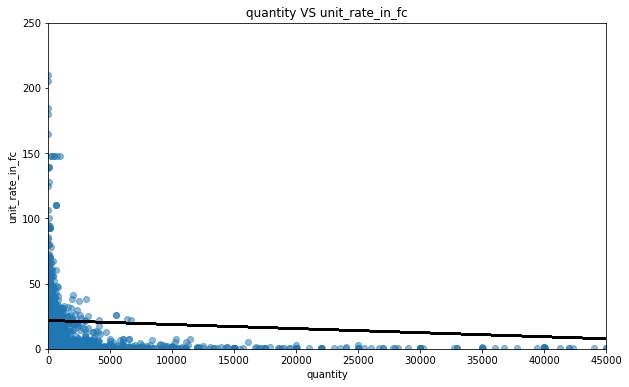

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(quantity,unit_rate_in_fc,alpha=0.5)
plt.plot(quantity,model.predict(quantity), color='black',linewidth=2)
plt.title("quantity VS unit_rate_in_fc")
plt.xlabel("quantity")
plt.ylabel("unit_rate_in_fc")
plt.ylim(0,250)
plt.xlim(0,45000)
plt.show()

### as we can see from the above linear regression model the points are away from the diagonal and the diagonal is moving downwards hence we need to use 

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

In [ ]:
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(xs, y)